In [4]:
import numpy as np
import pandas as pd
import quandl
import math
import numpy as np
from sklearn  import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime 
from matplotlib import style
import pickle

In [5]:
df = quandl.get('WIKI/GOOGL')
#df.to_csv('data.csv')

In [6]:
#df=pd.read_csv('data.csv')

In [7]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [8]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [9]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [10]:
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0


In [11]:
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [12]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [13]:
forecast_col='Adj. Close'

In [14]:
# Fill missing data with an arbitrary value to ensure there are all numerical values
# It will be treated as an outlier instead of dropping the column
df.fillna(-99999,inplace=True)

In [15]:
# math.ceil takes a number and returns the nearest whole number
forecast_out=int(math.ceil(0.1*len(df)))
forecast_out

343

In [16]:
# Create the label column
df['label']=df[forecast_col].shift(-forecast_out)

In [17]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,214.005615
2004-08-20,54.322689,0.710922,7.227007,22834300.0,210.725489
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,1.886792,1.183658,9188600.0,223.309335


In [18]:
#df.dropna(inplace=True)

In [19]:
#Create features
X=np.array(df.drop(['label'],1))

In [20]:
X=preprocessing.scale(X)# scale features
X=X[:-forecast_out]
X_lately= X[-forecast_out:]

In [21]:
df.dropna(inplace=True)

In [22]:
#Create label
y=np.array(df['label'])

In [23]:
len(X),len(y)

(3081, 3081)

In [24]:
#Create training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [25]:
# training data with linear regression
clf=LinearRegression(n_jobs=-1)

In [26]:
#fit data to model 
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [27]:
#Pickling- saving model
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)


In [28]:
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [29]:
print(clf)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [30]:
accuracy=clf.score(X_test,y_test)

In [31]:
accuracy

0.8776369245404377

In [32]:
# training data with support vector machines regressor
clf2=svm.SVR()
clf2.fit(X_train,y_train)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
accuracy2=clf2.score(X_test,y_test)
accuracy2

0.6853331107539891

In [34]:
forecast_set=clf.predict(X_lately)

In [35]:
print(forecast_set, accuracy, forecast_out)

[ 691.421833    687.88840422  685.78838731  703.16781073  727.79059272
  747.97394779  738.687661    763.53665053  881.32476395  872.0776959
  891.9059274   897.96683796  865.07370959  839.9789745   842.29647451
  829.45707585  827.70019636  841.25710155  828.3496745   838.95992122
  835.51003961  858.40221137  840.85845686  834.54586526  839.91137844
  873.92147857  866.6329423   867.65373918  869.7581065   872.23884812
  870.27340656  878.95599235  869.19506485  833.95182364  835.58707475
  803.67731779  839.45642458  839.5785753   831.93592391  832.95363954
  810.60601496  810.00899164  813.40198241  794.69580994  807.63186936
  822.29070828  826.17655852  821.6944691   818.02712488  843.75706694
  835.316752    859.85643428  835.57895395  836.60876111  820.72236406
  829.01952689  825.312277    818.34497894  802.65934547  798.18391174
  802.78754797  807.49610748  837.75292139  848.57400498  852.5242452
  845.34171267  838.76826048  845.78386184  853.02772693  868.72227526
  863.90

In [36]:
df['Forecast']=np.nan

In [37]:
last_date=df.iloc[-1].name
last_date

Timestamp('2016-11-10 00:00:00')

In [38]:
last_unix=last_date.timestamp()
last_unix

1478736000.0

In [39]:
one_day= 864000
next_unix =last_unix + one_day

In [41]:
for i in forecast_set:
    next_date =datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

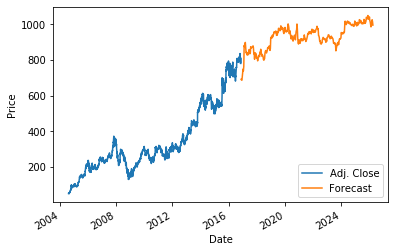

In [42]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()